In [1]:
import numpy as np
import pandas as pd



In [13]:
link_file = '../../ml-32m/links.csv'
movies_file = '../../ml-32m/movies.csv'
tags_file = '../../ml-32m/tags.csv'
ratings_file = '../../ml-32m/ratings.csv'

In [15]:
links = pd.read_csv(link_file)
movies = pd.read_csv(movies_file)
tags = pd.read_csv(tags_file)
ratings = pd.read_csv(ratings_file)

In [16]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
87580,292731,26812510,1032473.0
87581,292737,14907358,986674.0
87582,292753,12388280,948139.0
87583,292755,64027,182776.0


In [19]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama


In [21]:
tags

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102
...,...,...,...,...
2000067,162279,90645,Rafe Spall,1320817734
2000068,162279,91079,Anton Yelchin,1322337407
2000069,162279,91079,Felicity Jones,1322337400
2000070,162279,91658,Rooney Mara,1325828398


In [23]:
ratings

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858
...,...,...,...,...
32000199,200948,79702,4.5,1294412589
32000200,200948,79796,1.0,1287216292
32000201,200948,80350,0.5,1294412671
32000202,200948,80463,3.5,1350423800


Potentially useful variables by intuition:

Scheme 1
*Action space*
Each movie vector/id, which should include/be linked to：
1. The titles of the movies: the similarity can be used as a criteria for recommendation
2. Year, title, genre, and tags, and average rating of the movie can help.

*Observations*
1. An user's average rating (related to the genre or not)
2. Some generization of the users' preference. (year, title, tags, average rating)

Reward = the actual rating of the user.
   

----------------------------------First explore the possible genres---------------------------------------

In [25]:
def genre_list(row):
    return row.split('|')

In [29]:
genre = pd.DataFrame(movies['genres']).applymap(genre_list)

In [31]:
genre

,genres
0,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,"[Adventure, Children, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]
...,...
87580,[Drama]
87581,"[Comedy, Drama]"
87582,[Drama]
87583,[Drama]


In [37]:
biglist = list(genre['genres'])
union = []
for l in biglist:
    union += l
union = set(union)

In [41]:
# The list of possible genres, not a lot, good news. Can have a graph of them.
union

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

Suggested state expression for genre: MultiDiscrete([2]*19) [ 0 0 0 0 0 ....] for no genre label


-----------------------------Next: the tags------------------------------
What someone is saying about the film. Can be understood as one sentense film criticism
Can be used for 1. sentiment analysis (may overlap with rating) 2. keyword extraction.

In [49]:
tags_list = list(tags['tag'])

In [61]:
set(tags_list)

{nan,
 'communication satellite',
 'Edward Ellis',
 'white piano',
 'Samurai Trilogy',
 'male and female protagonists',
 'reference to carl sagan',
 'Justice Smith',
 'calypso',
 'year 1485',
 'final image',
 'Scrat',
 'Carmen Duncan',
 'dark comedy',
 'english channel',
 'salem oregon',
 'apocalyptic future',
 'empathetic',
 'will wheaton',
 'Jennifer Burry',
 'loss of a child',
 'Brazil film',
 'Ken Hughes',
 'woman with a rifle',
 'carelessness',
 'Peter Stormare',
 '05.04.06',
 'trade off',
 'sex education',
 'writer-director',
 "lot's wife character",
 'head trauma',
 'Super Hero',
 'criminal negligence',
 'smoking in a car',
 'herd of giraffe',
 'One setting ',
 'fighting crime',
 'modified autobiography',
 'gravitational field',
 'Qing Dynasty',
 'rose mcgowan',
 'made up language',
 'Milwaukee',
 'asbestos',
 'seductive girl',
 'cartoon bulldog',
 'workload',
 'A.J. Cook',
 'scorpion bowl the drink',
 'Charles Starkweather',
 'Filmes Clássicos',
 'talking through a door',
 'Ins

In [53]:
len(tags_list)

2000072

In [63]:
len(set(tags_list)) #man this is still ALOT

140980

hat we potentially need in our model structure: 
something that can relate rating to subcategories
something that can relate user to keywords and subcategories


In [105]:
c = pd.DataFrame(ratings.groupby('movieId').size()).sort_values(by=0, ascending=False)

In [123]:
c

,0
movieId,
318,102929
356,100296
296,98409
2571,93808
593,90330
...,...
224967,1
224951,1
224947,1


In [109]:
import matplotlib.pyplot as plt

In [135]:
id = list(c.index)

In [145]:
list(c[0])

[102929,
 100296,
 98409,
 93808,
 90330,
 85010,
 77332,
 75233,
 73849,
 73122,
 72151,
 69482,
 68997,
 68383,
 67750,
 67496,
 67463,
 67449,
 67408,
 66440,
 65158,
 63298,
 61879,
 59334,
 58368,
 58031,
 57931,
 57449,
 57224,
 57073,
 57010,
 55940,
 55275,
 54844,
 53658,
 51518,
 50824,
 50442,
 49789,
 48722,
 48434,
 47210,
 47148,
 47131,
 46957,
 46771,
 46512,
 46508,
 46401,
 46289,
 46128,
 46036,
 45767,
 45553,
 45211,
 45135,
 44592,
 44430,
 44140,
 43730,
 43459,
 43111,
 42879,
 42728,
 42003,
 41846,
 41686,
 41463,
 41342,
 41217,
 41139,
 40585,
 40550,
 40334,
 40007,
 39993,
 39296,
 39189,
 38967,
 38965,
 38846,
 38652,
 38640,
 38627,
 38488,
 38446,
 38267,
 37973,
 37489,
 37301,
 37157,
 37001,
 36818,
 36802,
 36647,
 36468,
 36382,
 36349,
 36151,
 35969,
 35934,
 35452,
 35315,
 35303,
 35288,
 35236,
 35215,
 35173,
 35043,
 34888,
 34825,
 34648,
 33683,
 33343,
 33333,
 33284,
 32965,
 32831,
 32830,
 32683,
 32575,
 32518,
 32509,
 32501,
 32474

<BarContainer object of 2000 artists>

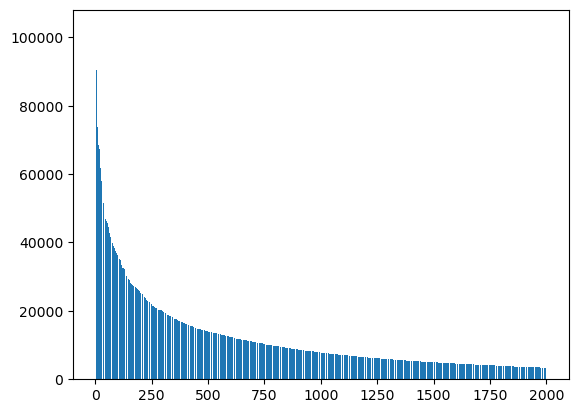

In [149]:
plt.bar([i for i in range(1,2001)],list(c[0])[:2000])

In [155]:
c[c[0]>100]

,0
movieId,
318,102929
356,100296
296,98409
2571,93808
593,90330
...,...
83478,101
6049,101
3880,101


In [191]:
c[c[0]>50] #let 50 be the threshod.

,0
movieId,
318,102929
356,100296
296,98409
2571,93808
593,90330
...,...
173629,51
173283,51
4931,51
